In [70]:
%run -i ../functions/load_packages.ipynb

# n_30 = pypsa.Network("../../pypsa-earth/networks/elec_s_30.nc")
# n_elec = pypsa.Network("../../pypsa-earth/networks/elec.nc")

regions_onshore = gpd.read_file("../../pypsa-earth/resources/shapes/gadm_shapes_custom.geojson")
regions_offshore = gpd.read_file("../../pypsa-earth/resources/shapes/gadm_shapes_offshore_custom.geojson")
# substations_OSMclean_path = "../../pypsa-earth/resources/osm/clean/all_clean_substations.geojson"

# lines_OSMclean_path = "../../pypsa-earth/resources/osm/clean/all_clean_lines.geojson"
industry_capacities = "../../pypsa-earth-sec/resources/custom_data/industrial_database.csv"

industry_share_ap = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_AP_2030.csv"
industry_share_nz = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_NZ_2030.csv"
industry_share_bs = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_BS_2030.csv"

industry_prod_ap  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_AP.csv"
industry_prod_nz  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_NZ.csv"
industry_prod_bs  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_BS.csv"


etotals_ap = "../../pypsa-earth-sec/data/energy_totals_AP_2030.csv"
etotals_nz = "../../pypsa-earth-sec/data/energy_totals_NZ_2030.csv"
etotals_bs = "../../pypsa-earth-sec/data/energy_totals_BS_2030.csv"

#2050 data
industry_share_ap_50 = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_AP_2050.csv"
industry_share_nz_50 = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_NZ_2050.csv"
industry_share_bs_50 = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_BS_2050.csv"

industry_prod_ap_50  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_AP.csv"
industry_prod_nz_50  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_NZ.csv"
industry_prod_bs_50  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_BS.csv"

etotals_ap_50 = "../../pypsa-earth-sec/data/energy_totals_AP_2050.csv"
etotals_nz_50 = "../../pypsa-earth-sec/data/energy_totals_NZ_2050.csv"
etotals_bs_50 = "../../pypsa-earth-sec/data/energy_totals_BS_2050.csv"

In [71]:
df = pd.read_csv(industry_capacities, keep_default_na=False,
        na_values=[""])

geometry = gpd.points_from_xy(df.y, df.x)
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,country,x,y,technology,capacity,unit,quality,company,location,start year,Latest renovation year,Source,Comments,geometry
0,NA,-22.189381,17.303929,Industry Steel Secondary EAF,1500.0,Kt/yr,actual,Hyron Steel Namibia plant,Khomas,Proposed,NaN,Tracker Map - Global Energy Monitor,NaN,POINT (17.30393 -22.18938)
1,NA,-17.777380,15.763281,Industry Steel Secondary EAF,3000.0,Kt/yr,actual,Groot Suisse Oshana steel plant,"Ongwediva, Oshana",2022,NaN,Tracker Map - Global Energy Monitor,NaN,POINT (15.76328 -17.77738)
2,NA,-26.659553,15.085991,Industry Chemical Ammonia Renewable,350.0,Kt/yr,actual,Hyphen Green Hydrogen project,Erongo,Proposed,NaN,Daures Green Village (gh2namibia.com),NaN,POINT (15.08599 -26.65955)
3,NA,-20.419305,16.676885,Industry NMM Cement,500.0,Kt/yr,actual,Whale Rock Cement (Pty) Ltd,Otjiwarongo,2018,NaN,Cheetah Cement to re-enter local market with m...,NaN,POINT (16.67688 -20.41931)
4,NA,-19.520701,17.448800,Industry NMM Cement,1000.0,Kt/yr,actual,Ohorongo Cement,Otavi,2010,NaN,About Us - Ohorongo Cement (PTY) Ltd (ohorongo...,NaN,POINT (17.44880 -19.52070)


[-2.91992e+00  1.50004e+03  3.00000e+03] 0    1500.00
1    3000.00
2     350.00
3     500.00
4    1000.00
5       0.08
6       2.10
7       3.30
Name: capacity, dtype: float64
[1.50000e+00 1.50004e+03 3.00000e+03] 0    1500.00
1    3000.00
2     350.00
3     500.00
4    1000.00
5       0.08
6       2.10
7       3.30
Name: capacity, dtype: float64


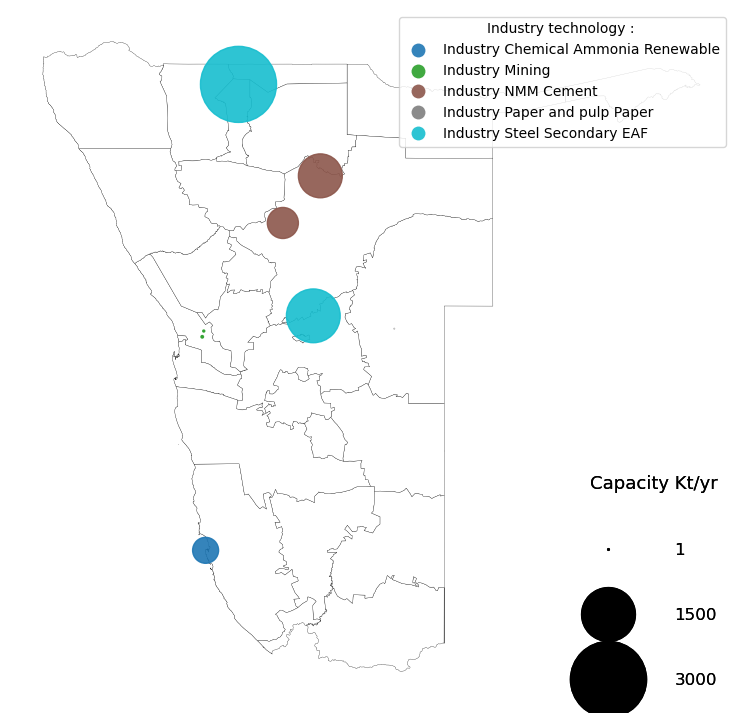

In [72]:
#plot gens
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
regions_onshore.to_crs(epsg=4326).plot(
                                        ax=ax, 
                                        color="white", 
                                        edgecolor="black", 
                                        linewidth=0.2)
markersize = geo_df['capacity']

geo_df.to_crs(epsg=4326).plot(
                                ax=ax,
                                column='technology',
                                alpha=0.9,
                                markersize=markersize, legend=True,
                                legend_kwds={'title': "Industry technology : ",
                                'frameon' : 'False'}
                                )
ax.set_axis_off()    

# need to add existing legend back
leg1 = ax.get_legend()

# some bins to indicate size in legend
_, bins = pd.cut(markersize, bins=2, precision=2, retbins=True)
print(bins, markersize)
bins[0] = 1.5
print(bins, markersize)
# create second legend
ax.add_artist(
    ax.legend(
        handles=[
            mlines.Line2D(
                [],
                [],
                color="black",
                lw=0,
                marker="o",
                markersize=np.sqrt(b),
                label=str(int(b)),
            )
            for i, b in enumerate(bins)
        ],
        loc=4,
        handletextpad=3.0,
        labelspacing=3,
        ncol=1,
        title="Capacity Kt/yr",
        title_fontsize=13,
        fontsize=12,
        frameon=False,
    )
)
# restore original legend
ax.add_artist(leg1)

Demand scenario,Ambitious Plans (AP) 2030,Net Zero (NZ) 2030,Base Line (BS) 2030,Ambitious Plans (AP) 2050,Net Zero (NZ) 2050,Base line (BS) 2050
Industry Steel Primary DRI,1275000,1275000,1275000,1894583,1894583,1894583
Industry Steel Secondary EAF,2550000,2550000,2550000,3789166,3789166,3789166
Industry Steel Other,1,1,1,1,1,1
Industry Chemical Other,1,1,1,1,1,1
Industry NMM Cement,739477,718349,739477,863632,837852,863632
Industry NMM Other,1,1,1,1,1,1
Industry Food and tobacco,1,1,1,1,1,1
Industry Construction,1,1,1,1,1,1
Industry Mining,1,1,1,1,1,1
Industry Machinery,1,1,1,1,1,1


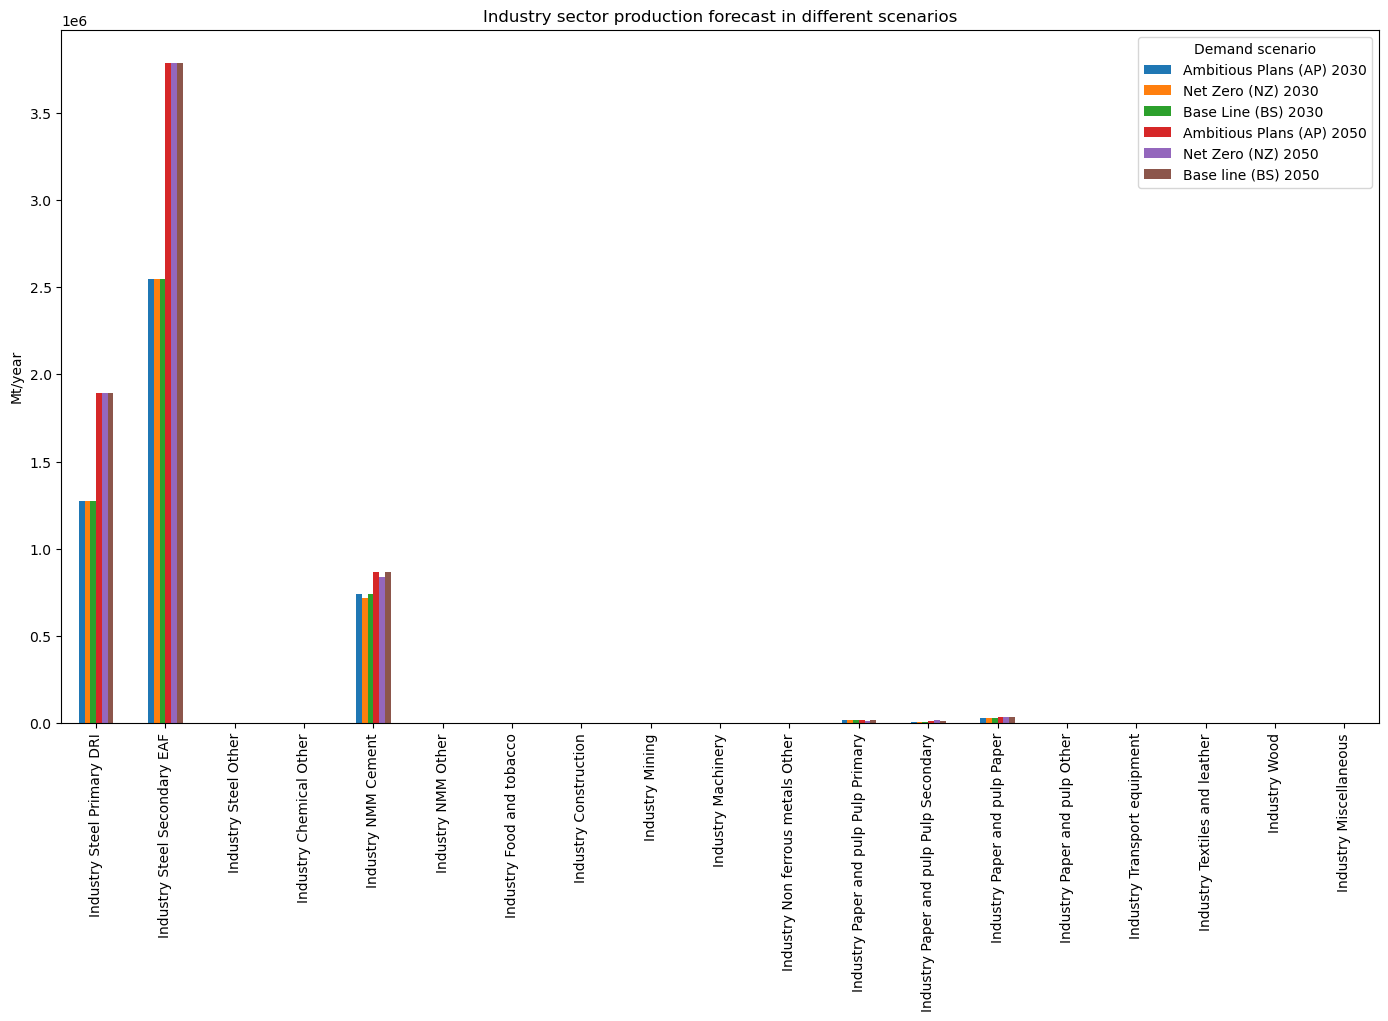

In [73]:
li = []
df=[]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
df1 = pd.read_csv(industry_prod_ap, keep_default_na=False,na_values=[""])
df1["Demand scenario"] = "Ambitious Plans (AP) 2030"
li.append(df1)
df2 = pd.read_csv(industry_prod_nz, keep_default_na=False,na_values=[""])
df2["Demand scenario"] = "Net Zero (NZ) 2030"
li.append(df2)
df3 = pd.read_csv(industry_prod_bs, keep_default_na=False,na_values=[""])
df3["Demand scenario"] = "Base Line (BS) 2030"
li.append(df3)

df4 = pd.read_csv(industry_prod_ap_50, keep_default_na=False,na_values=[""])
df4["Demand scenario"] = "Ambitious Plans (AP) 2050"
li.append(df4)
df5 = pd.read_csv(industry_prod_nz_50, keep_default_na=False,na_values=[""])
df5["Demand scenario"] = "Net Zero (NZ) 2050"
li.append(df5)
df6 = pd.read_csv(industry_prod_bs_50, keep_default_na=False,na_values=[""])
df6["Demand scenario"] = "Base line (BS) 2050"
li.append(df6)

frame = pd.concat(li, axis=0, ignore_index=True)

df = frame.drop(['Mt/year'], axis=1)
df = df.set_index('Demand scenario')
df = df.transpose()
df= df.loc[(df!=0).any(axis=1)]
df.plot(kind="bar", title= "Industry sector production forecast in different scenarios", ylabel = "Mt/year", ax=ax)
# df.plot.bar(x='scenario', rot=1, title='Industrial production demand for 2030', figsize=(15,10), fontsize=12)
df

In [74]:
 
# li.append(df2)
#df = pd.concat(li, axis=0, ignore_index=False)
#df = df.drop(['Demand scenario'], axis=1)
# #df = df.set_index('Demand scenario')
# #df 
# #df.groupby('carrier')['Demand scenario'].plot(legend=True)
#add DataFrames to subplots
#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])
#df.plot.bar(x='carrier', rot=1, title='Industrial production demand for 2030', figsize=(15,10), fontsize=12)


#df
df1 = pd.read_csv(industry_share_ap, keep_default_na=False,na_values=[""])
df1

,carrier,Industry Steel Primary Blast Furnace Open Hearth Furnace,Industry Steel Primary Blast Furnace Basic Oxygen Furnace,Industry Steel Primary DRI,Industry Steel Secondary EAF,Industry Steel Casting Rolling Finishing,Industry Steel Other,Industry Chemical Ammonia SMR,Industry Chemical Ammonia Other conventional,Industry Chemical Ammonia Renewable,...,Industry Non ferrous metals Aluminium Secondary,Industry Non ferrous metals Other,Industry Paper and pulp Pulp Primary,Industry Paper and pulp Pulp Secondary,Industry Paper and pulp Paper,Industry Paper and pulp Other,Industry Transport equipment,Industry Textiles and leather,Industry Wood,Industry Miscellaneous
0,oil,0.000000,0.000000,0.000000,0.00000,0.0,0.59,0.00,3.81,0.0,...,2.30,0.000000,1.08,0.08,0.34,0.0,0.0,0.0,0.0,0.00
1,gas,0.000000,0.000000,1.600000,0.14000,0.0,0.00,2.89,0.00,0.0,...,0.00,0.000000,0.22,0.00,0.00,0.0,0.0,0.0,0.0,0.00
2,electricity,0.250000,0.170000,0.570000,0.59000,0.0,0.00,0.12,1.14,1.9,...,0.58,0.000000,0.22,0.10,0.46,0.0,0.0,0.0,0.0,121067.14
3,coal,3.910000,2.670000,0.000000,0.00000,0.0,0.00,0.00,0.00,0.0,...,0.00,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
4,heat,0.000000,0.000000,0.000000,0.00000,0.0,0.00,0.00,0.00,0.0,...,0.00,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
5,biomass,0.780000,0.530000,0.000000,0.08000,0.0,0.00,0.00,0.00,0.0,...,0.00,0.000000,2.83,0.34,1.49,0.0,0.0,0.0,0.0,0.00
6,hydrogen,0.260000,0.180000,1.030000,0.00000,0.0,0.00,0.00,0.00,0.0,...,0.00,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00
7,process emission,0.027663,0.027663,0.216389,0.02449,0.0,0.00,0.00,0.00,0.0,...,0.00,0.169967,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00


<AxesSubplot:title={'center':'Energy carrier sectoral ratios in 2030 : Net Zero (NZ)'}, ylabel='Ratio'>

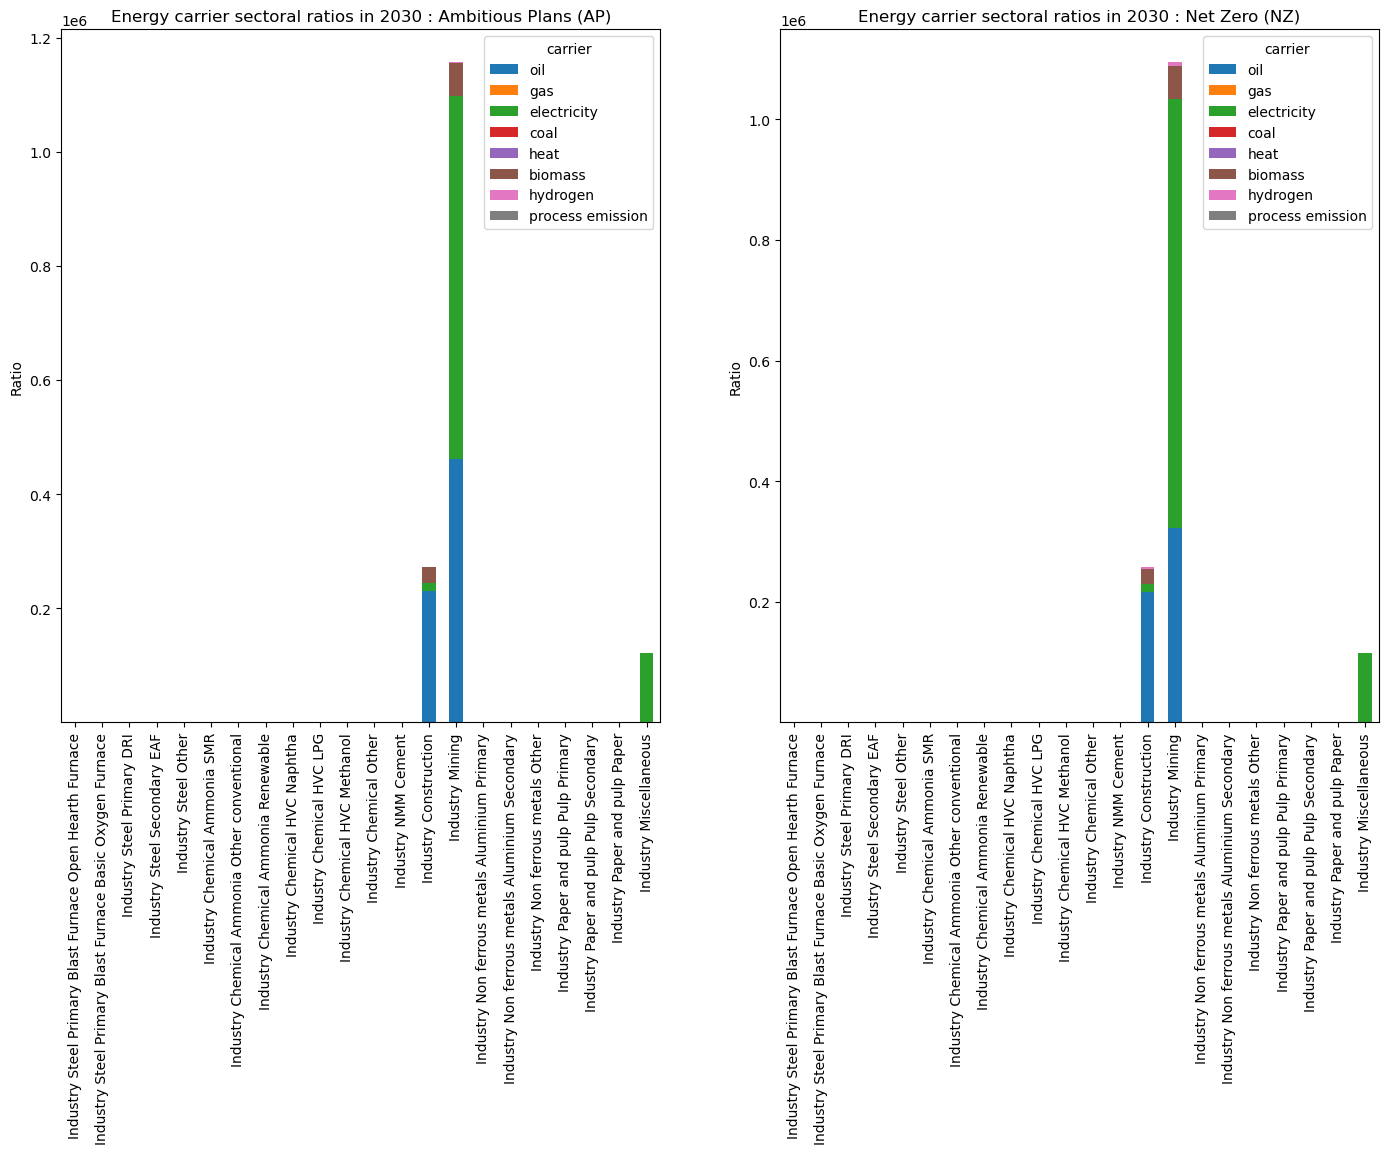

In [75]:
#define subplot layout
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17, 9)

df1 = pd.read_csv(industry_share_ap, keep_default_na=False,na_values=[""])

df1 = df1.set_index('carrier')
df1 = df1.transpose()
df1= df1.loc[(df1!=0).any(axis=1)]

df1.plot(kind="bar", stacked = True, ax=ax[0], title= "Energy carrier sectoral ratios in 2030 : Ambitious Plans (AP)", ylabel = "Ratio")

df2 = pd.read_csv(industry_share_nz, keep_default_na=False,na_values=[""])
df2 = df2.set_index('carrier')
df2 = df2.transpose()
df2= df2.loc[(df2!=0).any(axis=1)]

df2.plot(kind="bar", stacked = True, ax=ax[1], title= "Energy carrier sectoral ratios in 2030 : Net Zero (NZ)", ylabel = "Ratio")

<AxesSubplot:title={'center':'Energy carrier sectoral ratios in 2050 : Net Zero (NZ)'}, ylabel='Ratio'>

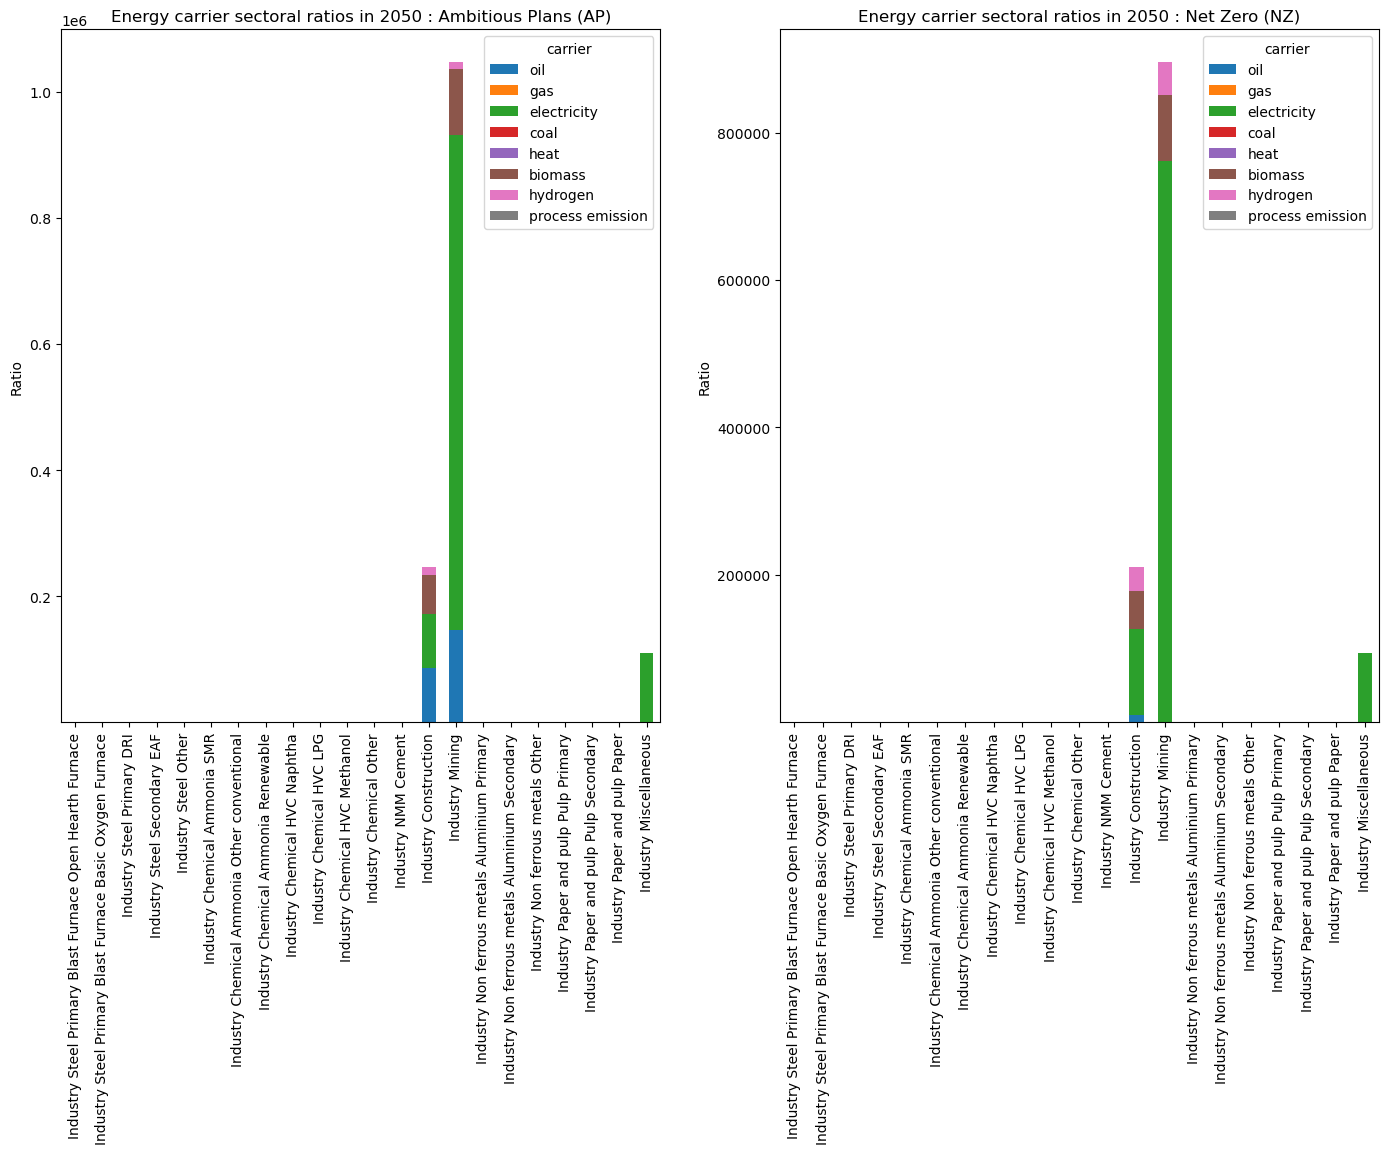

In [76]:
#2050 data
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17, 9)

df3 = pd.read_csv(industry_share_ap_50, keep_default_na=False,na_values=[""])
df3 = df3.set_index('carrier')
df3 = df3.transpose()
df3= df3.loc[(df3!=0).any(axis=1)]

df3.plot(kind="bar", stacked = True, ax=ax[0], title= "Energy carrier sectoral ratios in 2050 : Ambitious Plans (AP)", ylabel = "Ratio")
df4 = pd.read_csv(industry_share_nz_50, keep_default_na=False,na_values=[""])
df4 = df4.set_index('carrier')
df4 = df4.transpose()
df4= df4.loc[(df4!=0).any(axis=1)]

df4.plot(kind="bar", stacked = True, ax=ax[1], title= "Energy carrier sectoral ratios in 2050 : Net Zero (NZ)", ylabel = "Ratio")


<AxesSubplot:title={'center':'Total energy demand forecast in different sectors'}, ylabel='TWh'>

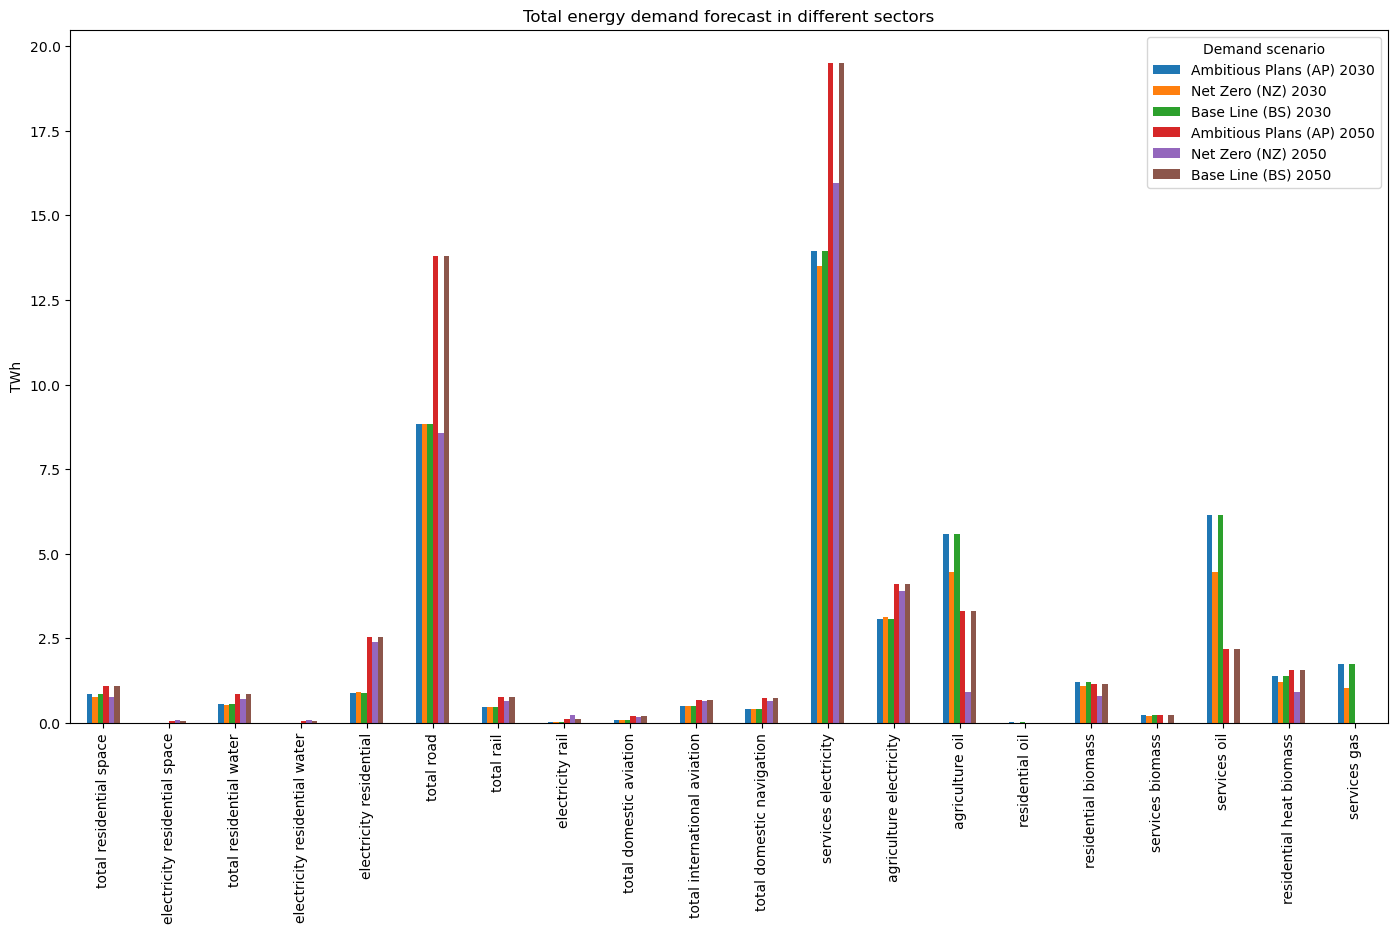

In [90]:
li = []
df = []

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)

df1 = pd.read_csv(etotals_ap, keep_default_na=False,na_values=[""])
df1["Demand scenario"] = "Ambitious Plans (AP) 2030"
li.append(df1)
df2 = pd.read_csv(etotals_nz, keep_default_na=False,na_values=[""])
df2["Demand scenario"] = "Net Zero (NZ) 2030"
li.append(df2)
df3 = pd.read_csv(etotals_bs, keep_default_na=False,na_values=[""])
df3["Demand scenario"] = "Base Line (BS) 2030"
li.append(df3)

#2050
df4 = pd.read_csv(etotals_ap_50, keep_default_na=False,na_values=[""])
df4["Demand scenario"] = "Ambitious Plans (AP) 2050"
li.append(df4)
df5 = pd.read_csv(etotals_nz_50, keep_default_na=False,na_values=[""])
df5["Demand scenario"] = "Net Zero (NZ) 2050"
li.append(df5)
df6 = pd.read_csv(etotals_bs_50, keep_default_na=False,na_values=[""])
df6["Demand scenario"] = "Base Line (BS) 2050"
li.append(df6)

df = pd.concat(li, axis=0, ignore_index=True)
df = df.drop(['country'], axis=1)
df = df.set_index('Demand scenario')
df = df.transpose()
df= df.loc[(df!=0).any(axis=1)]
df= df.dropna()
df.plot(kind="bar", title= "Total energy demand forecast in different sectors", ylabel = "TWh", ax=ax)
#df